<a href="https://colab.research.google.com/github/MariaCarolinass/computacao-numerica/blob/main/raizes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raízes da função

Podemos encontrar a raíz de uma função f(x) igualando ela a zero e resolvendo o seu x usando, por exemplo, bhaskara ou fatoração. Entretanto, existem funções na qual a sua solução não possuí um valor númerico definido da sua raíz, dessa forma, precisamos usar métodos númericos para encontrar o melhor valor possível aproximado da raíz da função.

## Importações

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Função

In [3]:
v = 31
g = 9.8
c = 13
t = 6

def f(m):
  return v - ((g * m) / c) * (1 - np.exp(-t * (c / m)))

Intervalos da função:

In [4]:
a = 40
b = 60

Plotando o gráfico da função:

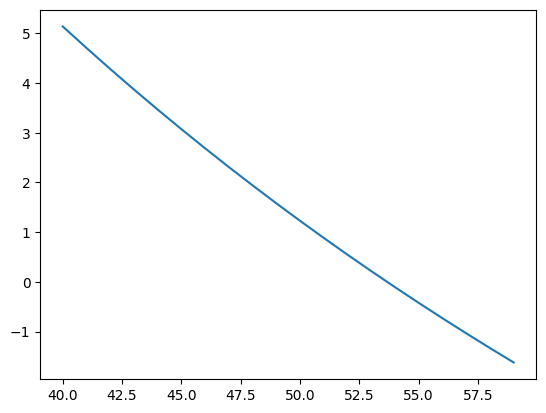

In [5]:
m = np.arange(a, b, 1)
plt.plot(m, f(m))
plt.show()

Ao plotar o gráfico escolhemos os pontos de a e b para o intervalo, onde a função toca próximo do zero no eixo x.

In [6]:
# Novos intervalos a partir do gráfico
a = 52
b = 55

## Método da Bissecção

O Método da Bissecção divide a função em pequena regiões de interesse, que são definidas a partir do ponto médio entre dois intervalos, onde possívelmente a raíz se encontra, até alcançar um valor que tenha um erro relativo menor que 10 elevado ao número da precisão negativo.

In [19]:
def bisseccao(a, b, erro, itMax):
  it = 0
  erro_relativo = 1
  m = a

  while (erro_relativo >= erro and it < itMax):
    mOld = m
    m = (a + b) / 2
    erro_relativo = abs((m - mOld) / m)

    # Teste de Bolsano
    if f(a) * f(m) < 0:
      b = m
    else:
      a = m

    it += 1

  return (m, erro_relativo, it)

Mostrando os resultados:

In [8]:
erro = 10 ** -4
itMax = 6

resultado = bisseccao(a, b, erro, itMax)

print("O valor da raíz é: ", resultado[0])
print("O erro relativo foi: ", resultado[1])
print("O número de iterações realizadas foi: ", resultado[2])

O valor da raíz é:  53.640625
O erro relativo foi:  0.000873871249635887
O número de iterações realizadas foi:  6


## Método da Falsa Posição

O Método da Falsa Posição funciona da mesma forma que o da Bissecção, porém com a diferença na forma como os intervalos de interesse são definidos. Ao invés de calcular o ponto médio entre dois intervalos, a falsa posição escolhe um valor, onde ao traçarmos uma reta tangente a dois intervalos, o valor será a posição que toca exatamente o ponto zero no eixo x.

In [20]:
def falsa_posicao(a, b, erro, itMax):
  it = 0
  erro_relativo = 1
  m = a

  while (erro_relativo >= erro and it < itMax):
    mOld = m
    m = a - f(a) * (b - a) / (f(b) - f(a))
    erro_relativo = abs((m - mOld) / m)

    # Teste de Bolsano
    if f(a) * f(m) < 0:
      b = m
    else:
      a = m

    it += 1

  return (m, erro_relativo, it)

Mostrando os resultados:

In [10]:
erro = 10 ** -4
itMax = 6

resultado = falsa_posicao(a, b, erro, itMax)

print("O valor da raíz é: ", resultado[0])
print("O erro relativo foi: ", resultado[1])
print("O número de iterações realizadas foi: ", resultado[2])

O valor da raíz é:  53.67009004580226
O erro relativo foi:  7.879443884796175e-06
O número de iterações realizadas foi:  3


A falsa posição é mais eficiente que a bissecção, pois o resultado é um valor mais aproximado da raíz. Além de ter realizado menos interações para encontrar a raíz.

## Método de Newton-Rapson

No método de Rapson não é preciso utilizar intervalos para encontrar a raíz dentro de dois pontos. Nesse método é preciso somente de uma estimativa inicial próxima da região onde queremos encontrar a raiz. Partimos de um valor inicial e vamos aproximando esse valor traçando uma reta tangente na região de interesse até o ponto que toca x.

Derivada da Função:

In [11]:
def df(m):
  return np.exp(-78.0 / m) * (g / c + 58.8 / m) - g / c

Função de Newton-Rapson:

In [21]:
def newton(m0, erro, itMax):
  it = 0
  erro_relativo = 1
  m = m0

  while (erro_relativo >= erro and it < itMax):
    mOld = m
    m = m - f(m) / df(m)
    erro_relativo = abs((m - mOld) / m)

    it += 1

  return (m, erro_relativo, it)

Mostrando os resultados:

In [22]:
m0 = 54
erro = 10 ** -4
itMax = 6

resultado = newton(m0, erro, itMax)

print("O valor da raíz é: ", resultado[0])
print("O erro relativo foi: ", resultado[1])
print("O número de iterações realizadas foi: ", resultado[2])

O valor da raíz é:  53.670082287970615
O erro relativo foi:  2.189532833766564e-05
O número de iterações realizadas foi:  2


Esse método foi mais eficiente que o da Bissecção e Falsa Posição. No método de Newton alcançamos uma estimativa numérica com apenas 2 interações.

## Método da Secante

O Método da Secante é uma alternativa ao Método de Newton para que não seja preciso determinar a derivada da função. Esse método é uma pequena modificação na função de newton, porém na função da secante precisamos de duas estimativas iniciais. Para chegar na raiz, usamos uma reta secante como aproximação da reta tangente até chegar ao ponto que toca x.    

In [23]:
def secante(m0, m1, erro, itMax):
  it = 0
  erro_relativo = 1
  ma1 = m0
  m = m1

  while (erro_relativo >= erro and it < itMax):
    ma2 = ma1
    ma1 = m
    m = ma1 - f(ma1) * (ma2 - ma1) / (f(ma2) - f(ma1))
    erro_relativo = abs((m - ma1) / m)

    it += 1

  return (m, erro_relativo, it)

Mostrando os resultados:

In [24]:
x0 = 54
x1 = 55
erro = 10 ** -4
itMax = 6

resultado = secante(x0, x1, erro, itMax)

print("O valor da raíz é: ", resultado[0])
print("O erro relativo foi: ", resultado[1])
print("O número de iterações realizadas foi: ", resultado[2])

O valor da raíz é:  53.670150448575974
O erro relativo foi:  8.963342741959718e-05
O número de iterações realizadas foi:  2


O método de Newton foi mais eficiente que o da Secante, pois a função newton retornou um erro relativo menor que a função secante.